In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books = pd.read_csv("Books.csv", low_memory = False)
users = pd.read_csv("users.csv", low_memory = False)
ratings = pd.read_csv("ratings.csv", low_memory = False)

# Data Preprocessing

In [4]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [7]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [8]:
books.duplicated().sum()
users.duplicated().sum()
ratings.duplicated().sum()

0

In [9]:
def dataset_overview(df, name):
    print(f"\nDataset: {name}")
    print("-" * 50)
    print(df.info())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDescriptive Statistics:\n", df.describe(include='all'))
    print("\nFirst 5 rows:\n", df.head())

dataset_overview(ratings, "Ratings")
dataset_overview(users, "Users")
dataset_overview(books, "Books")


Dataset: Ratings
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None

Missing Values:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Descriptive Statistics:
              User-ID        ISBN   Book-Rating
count   1.149780e+06     1149780  1.149780e+06
unique           NaN      340556           NaN
top              NaN  0971880107           NaN
freq             NaN        2502           NaN
mean    1.403864e+05         NaN  2.866950e+00
std     8.056228e+04         NaN  3.854184e+00
min     2.000000e+00         NaN  0.000000e+00
25%     7.034500e+04         NaN  0.000000e+00
50%     1.410100e

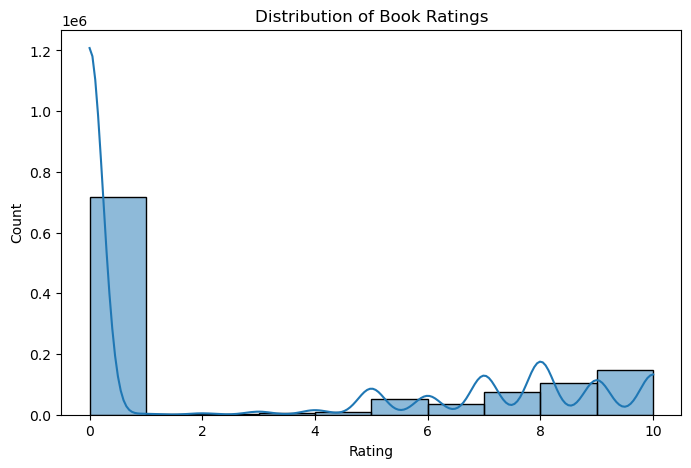

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['Book-Rating'], bins=10, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


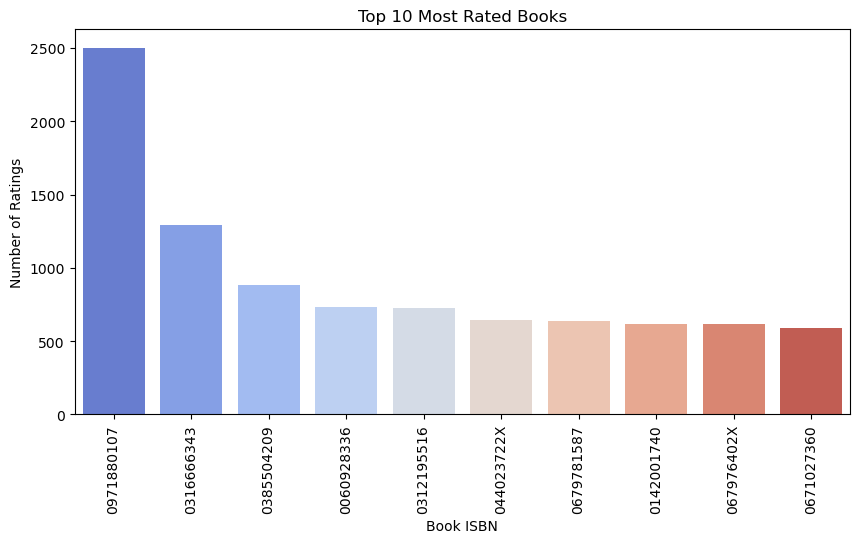

In [11]:
top_books = ratings['ISBN'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_books.index, y=top_books.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Top 10 Most Rated Books")
plt.xlabel("Book ISBN")
plt.ylabel("Number of Ratings")
plt.show()


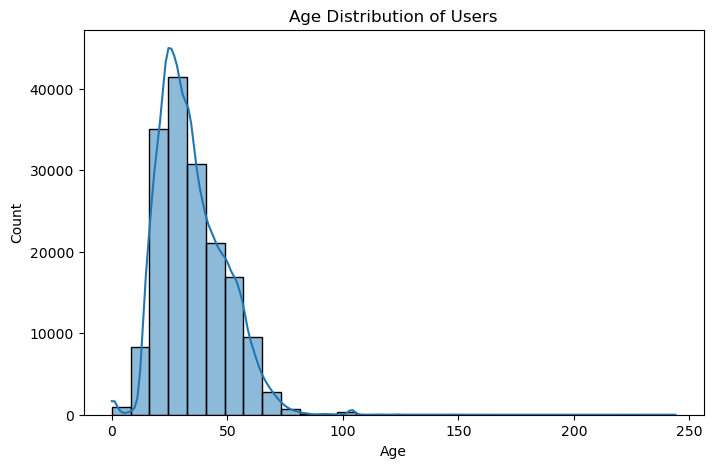

In [12]:
if 'Age' in users.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(users['Age'].dropna(), bins=30, kde=True)
    plt.title("Age Distribution of Users")
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()



# Popularity-Based Recommendation (Baseline)

In [13]:
book_ratings = ratings.merge(books, on="ISBN")

In [14]:
top_rated_books = book_ratings.groupby('Book-Title').size().sort_values(ascending=False).head(10)
print("\nTop 10 Most Rated Books:")
print(top_rated_books)


Top 10 Most Rated Books:
Book-Title
Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   898
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               815
The Secret Life of Bees                             774
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
dtype: int64


In [15]:
book_avg_ratings = book_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()
book_avg_ratings.rename(columns = {'Book-Rating':'average_rating'},inplace= True)
book_avg_ratings

# popular_books = book_avg_ratings[book_avg_ratings['Rating Count'] >= 50].sort_values(by='Average Rating', ascending=False).head(10)
# print("\nTop 10 Highest Rated Books (min 50 ratings):")
# print(popular_books)

C:\Users\sjash\AppData\Local\Temp\ipykernel_25860\741312778.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  book_avg_ratings = book_ratings.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [16]:
num_avg_ratings = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_avg_ratings.rename(columns = {'Book-Rating':'number_rating'},inplace= True)
num_avg_ratings

,Book-Title,number_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [17]:
popular_df = num_avg_ratings.merge(book_avg_ratings, on='Book-Title')
popular_df


,Book-Title,number_rating,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


# Top 50 Books

In [18]:
popular_df=popular_df[popular_df['number_rating'] >= 250].sort_values('average_rating', ascending=False).head(50)
popular_df = popular_df.merge(books[['Book-Title', 'Book-Author', 'Image-URL-L']], on='Book-Title')

In [19]:
popular_df

,Book-Title,number_rating,average_rating,Book-Author,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,http://images.amazon.com/images/P/0786222743.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
4,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,http://images.amazon.com/images/P/0439139600.0...
...,...,...,...,...,...
191,Lord of the Flies,259,3.818533,William G. Golding,http://images.amazon.com/images/P/0698102193.0...
192,A Prayer for Owen Meany,413,3.796610,John Irving,http://images.amazon.com/images/P/0345361792.0...
193,A Prayer for Owen Meany,413,3.796610,John Irving,http://images.amazon.com/images/P/0345363523.0...
194,"The Vampire Lestat (Vampire Chronicles, Book II)",301,3.777409,ANNE RICE,http://images.amazon.com/images/P/0345313860.0...


# Collaborative filtering

In [28]:
a= book_ratings.groupby('User-ID').count()['Book-Rating'] > 200
filtered_users = a[a].index

In [31]:
filtered_ratings = book_ratings[book_ratings['User-ID'].isin(filtered_users)]

In [33]:
b = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
popular_books = b[b].index

In [37]:
pivot_table = (filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]).pivot_table(index='Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [42]:
pivot_table.fillna(0,inplace=True)
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Cosine similarity

In [47]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [48]:
cosine_sim = cosine_similarity(pivot_table)
cosine_sim_df = pd.DataFrame(cosine_sim, index=pivot_table.index, columns=pivot_table.index)

In [50]:
euclidean_dist = euclidean_distances(pivot_table)
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=pivot_table.index, columns=pivot_table.index)

In [54]:
def get_similar_books(book_title, num_recommendations=5):
    if book_title not in cosine_sim_df.index:
        print("Book not found in dataset.")
        return None

    similar_books = cosine_sim_df[book_title].sort_values(ascending=False)[1:num_recommendations+1]
    
    return list(similar_books.index)  # Return only book titles


In [55]:
def get_euclidean_books(book_title, num_recommendations=5):
    if book_title not in euclidean_dist_df.index:
        print("Book not found in dataset.")
        return None

    similar_books = euclidean_dist_df[book_title].sort_values(ascending=True)[1:num_recommendations+1]
    
    return list(similar_books.index)  # Return only book titles


In [56]:
print(get_similar_books("The Da Vinci Code", 5))


['Angels &amp; Demons', 'Touching Evil', 'Saving Faith', "The Sweet Potato Queens' Book of Love", 'Middlesex: A Novel']


In [57]:
print(get_euclidean_books("The Da Vinci Code", 5))


['Touching Evil', 'Last Man Standing', 'Saving Faith', 'Fine Things', 'Absolute Power']
